In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [83]:
taca_brasil = pd.read_csv('../data/processed/Partidas - Taça Brasil (1959 - 1968) .csv')
roberto = pd.read_csv('../data/processed/Partidas - Roberto Gomes Pedrosa (1967) - Consolidado.csv')
taca_de_prata = pd.read_csv('../data/processed/Partidas - Taça de Prata (1968 - 1970).csv')
camp_nac = pd.read_csv('../data/processed/Partidas - Campeonato Nacional de Clubes (1971 - 1974).csv')
copa_brasil1 = pd.read_csv('../data/processed/Partidas - CopaBrasil 1975-1978.csv')
brasileiro1 = pd.read_csv('../data/processed/Partidas - Brasileiro (1979).csv')
copa_brasil2 = pd.read_csv('../data/processed/Partidas - Copa Brasil (1980, 1984, 1986).csv')
taca_de_ouro = pd.read_csv('../data/processed/Partidas - Taça de Ouro (1981-1983 e 1985).csv')
copa_uniao = pd.read_csv('../data/processed/Partidas - Copa União (1987-1988).csv')
brasileiro2 = pd.read_csv('../data/processed/Partidas - Brasileiro (1989).csv')
camp_bras = pd.read_csv('../data/processed/Partidas - Campeonato Brasilieiro Série A (1990 - 1999).csv')
joao_hav = pd.read_csv('../data/processed/Partidas - Copa João Havelange (2000).csv')
brasileiraom = pd.read_csv('../data/processed/Partidas - Campeonato Brasileiro Série A (2001-2002).csv')
brasileiraop = pd.read_csv('../data/processed/Partidas - Campeonato Brasileiro Pontos Corridos (2003 - 2021).csv')


In [84]:
df = pd.concat([taca_brasil,roberto,taca_de_prata,camp_nac,copa_brasil1,brasileiro1,copa_brasil2,taca_de_ouro,copa_uniao,brasileiro2,camp_bras,joao_hav,brasileiraom,brasileiraop], ignore_index=True)

In [213]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'placar mandante': 'placar_mandante'})
df = df.rename(columns={'placar visitante': 'placar_visitante'})

In [214]:
df.head()

,fase,data,horário,mandante,visitante,placar_mandante,placar_visitante
0,1F,1959-08-23,00:00,Ferroviário-MA,Tuna Luso,1,3
1,1F,1959-08-23,00:00,Rio Branco-ES,Manufatora-RJ,3,0
2,1F,1959-08-23,00:00,Hercílio Luz,Atlético Paranaense,1,2
3,1F,1959-08-23,00:00,CSA,Bahia,0,5
4,1F,1959-08-23,00:00,Auto Esporte-PB,Sport,0,3


In [87]:
df['placar mandante'] = df['placar mandante'].astype(int)
df['placar visitante'] = df['placar visitante'].astype(int)

In [228]:
gols_mandantes = df['placar_mandante'].sum()
gols_visitantes = df['placar_visitante'].sum()
gols_totais = gols_mandantes + gols_visitantes
gols_mandantes_perc = (gols_mandantes/gols_totais)*100
gols_visitantes_perc = (gols_visitantes/gols_totais)*100
colnames = ["gols mandantes","gols visitantes","gols totais","gols mandantes perc","gols visitantes perc"]
lst = [gols_mandantes,gols_visitantes,gols_totais,gols_mandantes_perc,gols_visitantes_perc]
lst

[31146, 20325, 51471, 60.51174447747275, 39.48825552252725]

In [229]:
gols = pd.DataFrame([lst], columns=colnames)

In [230]:
gols

,gols mandantes,gols visitantes,gols totais,gols mandantes perc,gols visitantes perc
0,31146,20325,51471,60.511744,39.488256


In [232]:
gols_mandante_clube = df.groupby('mandante')['placar_mandante'].sum().sort_values(ascending=False).reset_index()
gols_mandante_clube.rename(columns  = {"mandante" : "clube", 'placar_mandante' : 'gols' }, inplace=True)

gols_visitante_clube = df.groupby('visitante')['placar_visitante'].sum().sort_values(ascending=False).reset_index()
gols_visitante_clube.rename(columns = {"visitante": "clube", 'placar_visitante': 'gols' }, inplace=True)

In [233]:
gols_mandante_clube.head(10)

,clube,gols
0,Santos,1368
1,Atlético Mineiro,1298
2,São Paulo,1297
3,Cruzeiro,1287
4,Internacional,1254
5,Flamengo,1253
6,Palmeiras,1251
7,Grêmio,1244
8,Corinthians,1148
9,Vasco,1145


In [234]:
gols_visitante_clube.head(10)

,clube,gols
0,São Paulo,943
1,Santos,906
2,Atlético Mineiro,892
3,Flamengo,890
4,Cruzeiro,858
5,Palmeiras,858
6,Corinthians,834
7,Fluminense,832
8,Grêmio,797
9,Internacional,795


In [235]:
gols_clube = pd.concat([gols_mandante_clube,gols_visitante_clube])

In [236]:
gols_clube.head()

,clube,gols
0,Santos,1368
1,Atlético Mineiro,1298
2,São Paulo,1297
3,Cruzeiro,1287
4,Internacional,1254


In [237]:
gols_marcados_clube = gols_clube.groupby('clube')['gols'].sum().sort_values(ascending=False).reset_index()

In [238]:
gols_marcados_clube.head(10)

,clube,gols
0,Santos,2274
1,São Paulo,2240
2,Atlético Mineiro,2190
3,Cruzeiro,2145
4,Flamengo,2143
5,Palmeiras,2109
6,Internacional,2049
7,Grêmio,2041
8,Corinthians,1982
9,Vasco,1919


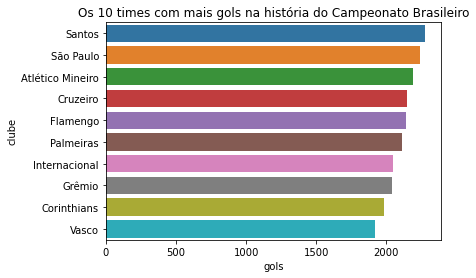

In [239]:
sns.barplot(x="gols", y="clube", data=gols_marcados_clube.head(10))
plt.title('Os 10 times com mais gols na história do Campeonato Brasileiro')
plt.show()

In [248]:
gols_sofridos_visitante = df.groupby('visitante')['placar_mandante'].sum().sort_values(ascending=False).reset_index()
gols_sofridos_visitante.rename(columns  = {"visitante" : "clube", 'placar_mandante' : 'gols_sofridos' }, inplace=True)

gols_sofridos_mandante = df.groupby('mandante')['placar_visitante'].sum().sort_values(ascending=False).reset_index()
gols_sofridos_mandante.rename(columns = {"mandante": "clube", 'placar_visitante': 'gols_sofridos' }, inplace=True)

In [249]:
gols_sofridos_visitante

,clube,gols_sofridos
0,Santos,1069
1,Fluminense,1067
2,Flamengo,1040
3,Atlético Mineiro,1040
4,Grêmio,1001
...,...,...
184,Rio Branco-RJ,2
185,Guanabara-DF,2
186,Ferroviário-MA,2
187,Comercial-PR,2


In [250]:
gols_sofridos_mandante

,clube,gols_sofridos
0,Vasco,734
1,Atlético Mineiro,714
2,Flamengo,702
3,Cruzeiro,696
4,Botafogo,690
...,...,...
183,Olímpico Clube,1
184,Olímpico-SC,1
185,Água Verde-PR,1
186,Fonseca-RJ,0


In [251]:
gols_sofridos = pd.concat([gols_sofridos_visitante,gols_sofridos_mandante])

In [252]:
gols_sofridos_clube = gols_sofridos.groupby('clube')['gols_sofridos'].sum().sort_values(ascending=False).reset_index()

In [253]:
gols_sofridos_clube.head(10)

,clube,gols_sofridos
0,Atlético Mineiro,1754
1,Fluminense,1754
2,Santos,1750
3,Flamengo,1742
4,Vasco,1706
5,Botafogo,1687
6,Cruzeiro,1674
7,São Paulo,1615
8,Grêmio,1608
9,Corinthians,1578


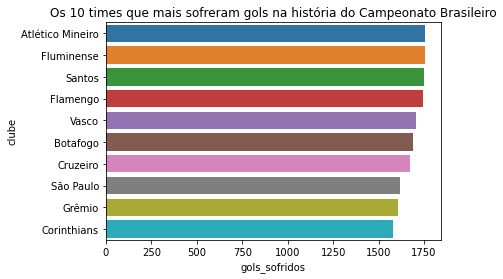

In [273]:
sns.barplot(x="gols_sofridos", y="clube", data=gols_sofridos_clube.head(10))
plt.title('Os 10 times que mais sofreram gols na história do Campeonato Brasileiro')
plt.show()

In [263]:
fec = df.query('mandante=="Fortaleza"')

In [264]:
fec

,fase,data,horário,mandante,visitante,placar_mandante,placar_visitante
39,1F,1961-07-16,17:00,Fortaleza,ABC,3,1
55,2F,1961-08-20,16:05,Fortaleza,Remo,2,1
56,2F,1961-08-23,21:00,Fortaleza,Remo,2,0
66,3F,1961-11-05,16:00,Fortaleza,Bahia,2,3
198,QF,1965-10-13,NaN,Fortaleza,Náutico,2,3
...,...,...,...,...,...,...,...
20655,R26,2021-10-13,20:30,Fortaleza,Grêmio,1,0
20675,R28,2021-10-23,19:15,Fortaleza,Athletico Paranaense,3,0
20715,R31,2021-11-10,21:30,Fortaleza,São Paulo,1,1
20731,R33,2021-11-17,20:00,Fortaleza,Ceará,0,4


In [265]:
fecvit = df.query('mandante=="Fortaleza" & placar_mandante>placar_visitante')

In [266]:
fecvit

,fase,data,horário,mandante,visitante,placar_mandante,placar_visitante
39,1F,1961-07-16,17:00,Fortaleza,ABC,3,1
55,2F,1961-08-20,16:05,Fortaleza,Remo,2,1
56,2F,1961-08-23,21:00,Fortaleza,Remo,2,0
235,3F,1966-08-31,NaN,Fortaleza,Paysandu,3,1
282,3F,1966-08-31,NaN,Fortaleza,Paysandu,3,1
...,...,...,...,...,...,...,...
20513,R11,2021-07-11,20:30,Fortaleza,Corinthians,1,0
20529,R13,2021-07-25,16:00,Fortaleza,Red Bull Bragantino,1,0
20655,R26,2021-10-13,20:30,Fortaleza,Grêmio,1,0
20675,R28,2021-10-23,19:15,Fortaleza,Athletico Paranaense,3,0


In [274]:
fecvitnum = 113/240

In [275]:
fecvitnum

0.4708333333333333

In [269]:
placar_fec = fecvit.groupby('mandante').sum()

In [270]:
placar_fec

,placar_mandante,placar_visitante
mandante,,
Fortaleza,256,69


In [271]:
fecmand = fec.groupby('mandante').sum()

In [272]:
fecmand

,placar_mandante,placar_visitante
mandante,,
Fortaleza,350,275
